In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv("D:\Yihe\Yihe\COOPER\COOPER2003\CooperBasin2003.csv")
#catalog

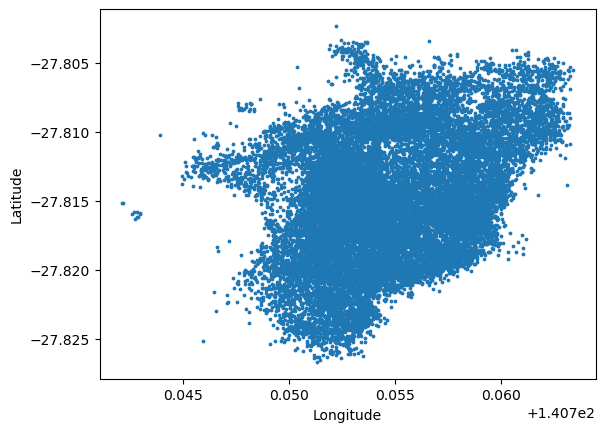

In [3]:
plt.scatter(catalog["Long"],catalog["Lat"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
# Inj St -0.738389815
# Inj End 32.65049907

injSt = -0.738389815
injEnd = 32.65049907 - injSt
print(injEnd)

dt = np.array(catalog['Time'].copy()) - injSt
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['ML'], catalog['X'], catalog['Y'], catalog['Z'])
    if injSt-injSt <= d <= injEnd and m<1
])
print(len(magF),len(dt))

33.388888885
20362 23285


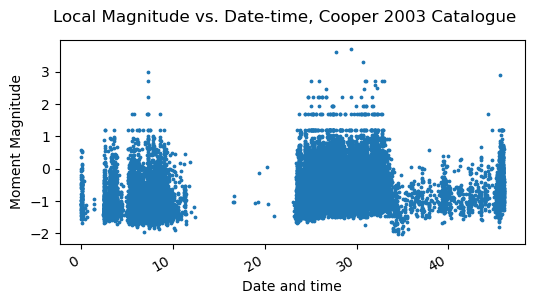

In [5]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(DT,catalog["ML"],s=3)
figure.suptitle("Local Magnitude vs. Date-time, Cooper 2003 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
figure.autofmt_xdate()
plt.show()

In [6]:
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

-14.0 57.0 -4157.0


In [7]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

2006-12-03 18:57:03


In [8]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [9]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [10]:
Mw = np.copy(catalog['ML'])
print(len(Mw))

23285


In [11]:
print(DT[0],DT[-1])

0.0 46.01002315


In [11]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

20362


In [15]:
# Inj End 32.65049907
MWN=[]
DTN=[]
dstN=[]
for i in range(len(DT)):
    if DT[i] < 32.65049907:
        MWN.append(catalog['ML'][i])
        DTN.append(DT[i])
        dstN.append(dist[i])

In [12]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

DTN = np.array(dtF)
MWN = np.array(magF)

for z in range(50,len(DTN)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(DTN[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(MWN[subDstRef[y]])
            rT.append(DTN[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        if y>=45:
            pM.append(MWN[subDstRef[y]])
            pT.append(DTN[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [13]:
print(len(rstM))

18270


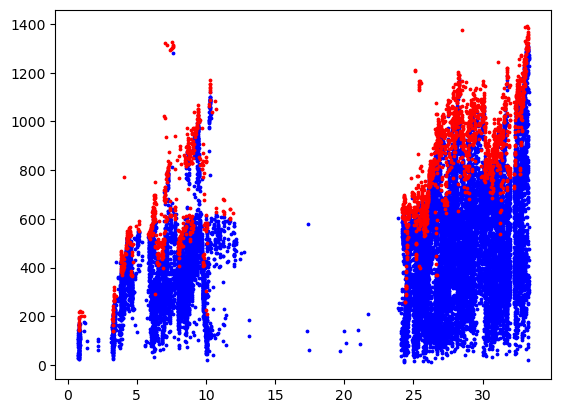

In [14]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [15]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830
1860
1890
1920
1950
1980
2010


In [16]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]

quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
print(len(rstM))
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

18270


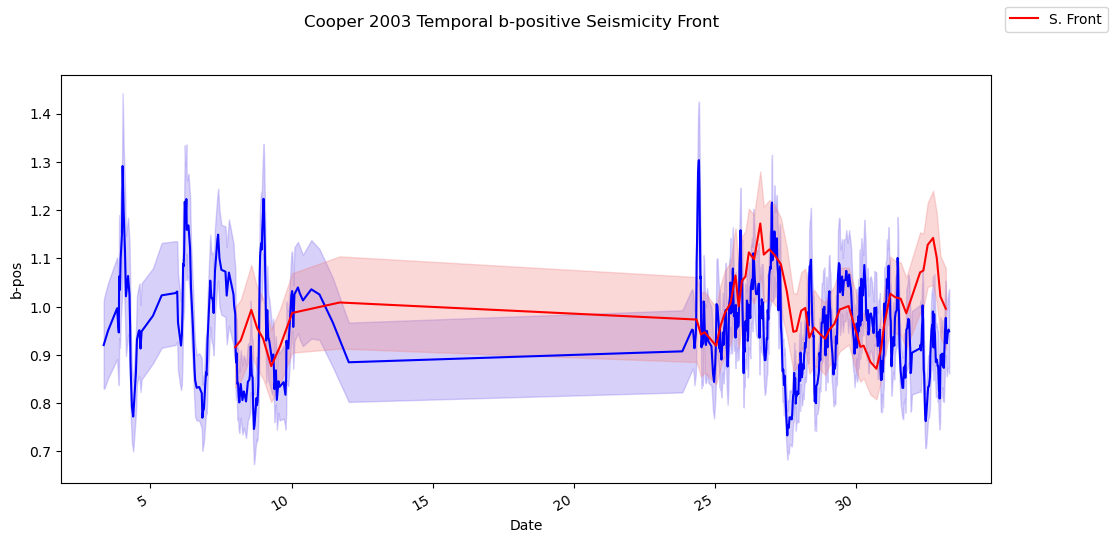

In [17]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("Cooper 2003 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [18]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

0.9078373012019366 0.82115001212437 0.919930950777534 0.03401472266234734
0.9456399548811127 0.9253041419848076 0.9648765894191019 0.010249684935095054


0.9078373012019366 0.82115001212437 0.919930950777534 0.03401472266234734
0.9456399548811127 0.9253041419848076 0.9648765894191019 0.010249684935095054

In [19]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

0.9690266023666899 0.8527165314941878 1.023798241632853 0.03888023320611168
0.9872858903699029 0.9215282100813909 1.0527061137889362 0.03318905698134412


0.9690266023666899 0.8527165314941878 1.023798241632853 0.03888023320611168
0.9872858903699029 0.9215282100813909 1.0527061137889362 0.03318905698134412

In [50]:
"""
90% bv
rst 0.8417496295216353 0.7916705031711573 0.8638115209579226 0.019410142152475815
perc 0.8469159292178943 0.778332965920437 0.9062795940540346 0.032345054797036005
bp
rst 0.8988413142083127 0.8803680657656008 0.920014410649712 0.009744659574387143
perc 0.9318918056604029 0.8739797613240033 0.9957572566907434 0.031645807643715676

80% bv
rst 0.8406813730522277 0.7848393783055551 0.8636165600546013 0.023909490023987158
perc 0.8367758344473063 0.7880688452403488 0.883643732304385 0.023522573785799576
bp
rst 0.894529078024279 0.8759282203076351 0.915570199614018 0.010147042205720515
perc 0.9143871285019021 0.8756327527704026 0.9589028573421786 0.021634069602853214
"""

#Neww
"""
90% bv
rst 0.8301046139434435 0.7686614510735 0.8447242733996856 0.02388209954343308
perc 0.8473688071558738 0.7693639783041729 0.9023853062802044 0.03396837374710551
bp
rst 0.886411298536352 0.8657608020665415 0.9051794288450543 0.009922927132422047
perc 0.9138394276730959 0.8486929502530386 0.9785942244466087 0.033455636444490545

80% bv
rst 0.8406813730522277 0.7848393783055551 0.8636165600546013 0.023909490023987158
perc 0.8367758344473063 0.7880688452403488 0.883643732304385 0.023522573785799576
bp
rst 0.894529078024279 0.8759282203076351 0.915570199614018 0.010147042205720515
perc 0.9143871285019021 0.8756327527704026 0.9589028573421786 0.021634069602853214
"""

Me
